In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [3]:
import matplotlib.pyplot as plt
from  matplotlib.image import imread

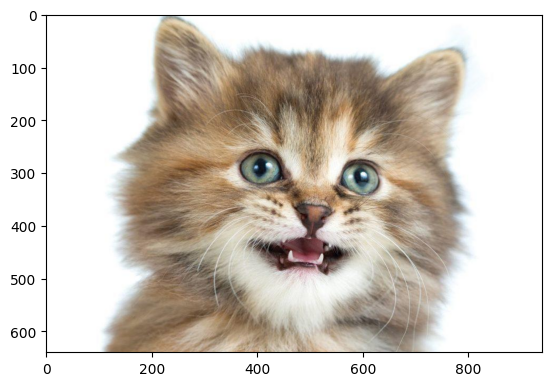

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread

# load image pixels
image = imread("C:/Users/AK/Downloads/archive/train/cats/cat_2.jpg")
# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

In [5]:
Folder=("C:/Users/AK/Downloads/Lesson end project/dataset (1)/dataset/training_set/cats/")

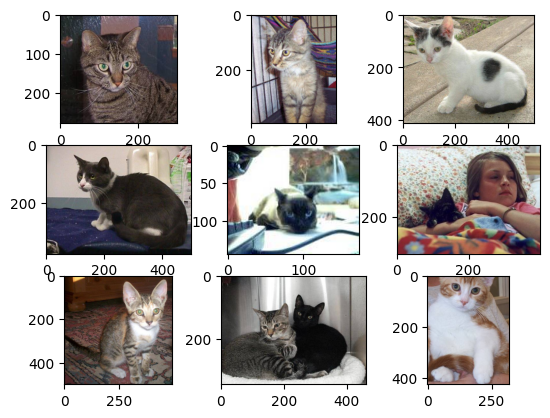

In [6]:
for i in range(9):
  plt.subplot(330+1+i)
  filename=Folder+'cat.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

In [8]:
plt.figure(figsize=(15,15))
image =load_img(r"C:/Users/AK/Downloads/Lesson end project/dataset (1)/dataset/training_set/cats/cat.1.jpg")

<Figure size 1500x1500 with 0 Axes>

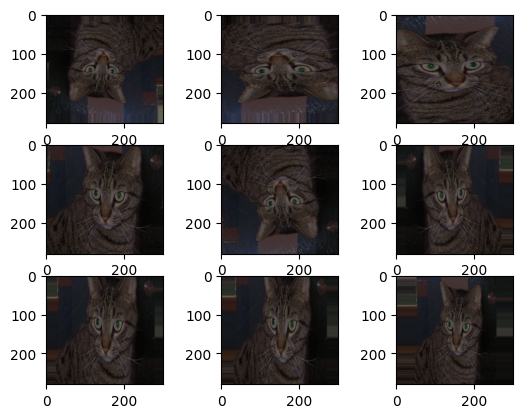

In [9]:
data= img_to_array(image)
samples = expand_dims(data, 0)
datagen=ImageDataGenerator( rotation_range=0,shear_range=0.2,
    zoom_range=0.5,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=0.5)
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
training_set=train_datagen.flow_from_directory('C:/Users/AK/Downloads/Lesson end project/dataset (1)/dataset/training_set',
                                              target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

test_set=test_datagen.flow_from_directory('C:/Users/AK/Downloads/Lesson end project/dataset (1)/dataset/test_set',
                                         target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(63,63,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 45)               

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 234s 929ms/step - loss: 0.6885 - accuracy: 0.5310 - val_loss: 0.6633 - val_accuracy: 0.5715
Epoch 2/25
250/250 [==============================] - 59s 237ms/step - loss: 0.6375 - accuracy: 0.6398 - val_loss: 0.6035 - val_accuracy: 0.7060
Epoch 3/25
250/250 [==============================] - 58s 231ms/step - loss: 0.5961 - accuracy: 0.6798 - val_loss: 0.5668 - val_accuracy: 0.7135
Epoch 4/25
250/250 [==============================] - 59s 236ms/step - loss: 0.5587 - accuracy: 0.7117 - val_loss: 0.5660 - val_accuracy: 0.7050
Epoch 5/25
250/250 [==============================] - 62s 246ms/step - loss: 0.5371 - accuracy: 0.7261 - val_loss: 0.5170 - val_accuracy: 0.7415
Epoch 6/25
250/250 [==============================] - 58s 231ms/step - loss: 0.5101 - accuracy: 0.7467 - val_loss: 0.5114 - val_accuracy: 0.7475
Epoch 7/25
250/250 [==============================] - 59s 234ms/step - loss: 0.4889 - accuracy: 0.7716 - val_loss: 0.5170 - val_a

In [20]:
model.save('cnni')

INFO:tensorflow:Assets written to: cnni\assets


INFO:tensorflow:Assets written to: cnni\assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


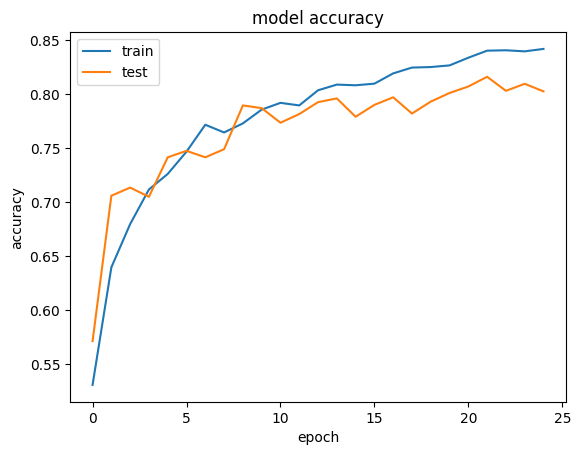

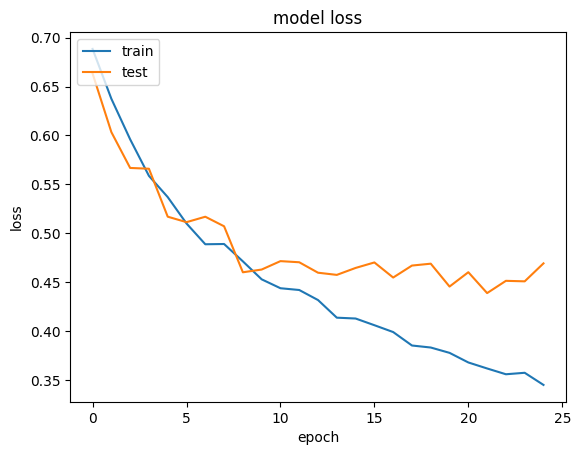

In [21]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
from tensorflow.keras.models import load_model
model=load_model('cnni')

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 45)               

In [24]:
result=model.evaluate(test_set)

63/63 [==============================] - 6s 94ms/step - loss: 0.4693 - accuracy: 0.8025


In [25]:
result= model.evaluate(training_set)

250/250 [==============================] - 37s 146ms/step - loss: 0.3469 - accuracy: 0.8430


In [26]:
import pandas as pd
test_set.reset
y_pred=model.predict_generator(test_set)

C:\Users\AK\AppData\Local\Temp\ipykernel_10008\1485126664.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred=model.predict_generator(test_set)


In [32]:
df=pd.DataFrame({'file': test_set.filenames,
               'pred':y_pred[:,0],
               'y':test_set.classes})

In [31]:
df

,file,pred,y
0,cats\cat.4001.jpg,0.016725,0
1,cats\cat.4002.jpg,0.997605,0
2,cats\cat.4003.jpg,0.005455,0
3,cats\cat.4004.jpg,0.025997,0
4,cats\cat.4005.jpg,0.088375,0
...,...,...,...
1995,dogs\dog.4996.jpg,0.818892,1
1996,dogs\dog.4997.jpg,0.999220,1
1997,dogs\dog.4998.jpg,0.997760,1
1998,dogs\dog.4999.jpg,0.081447,1


In [48]:
df['y_pred']=df['pred']>0.7

In [49]:
df.y_pred = df.y_pred.astype(int)

In [50]:
df

,file,pred,y,y_pred
0,cats\cat.4001.jpg,0.016725,0,0
1,cats\cat.4002.jpg,0.997605,0,1
2,cats\cat.4003.jpg,0.005455,0,0
3,cats\cat.4004.jpg,0.025997,0,0
4,cats\cat.4005.jpg,0.088375,0,0
...,...,...,...,...
1995,dogs\dog.4996.jpg,0.818892,1,1
1996,dogs\dog.4997.jpg,0.999220,1,1
1997,dogs\dog.4998.jpg,0.997760,1,1
1998,dogs\dog.4999.jpg,0.081447,1,0


In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(df.y_pred,df.y)

0.5025

In [53]:
from sklearn.metrics import classification_report
print(classification_report(df.y,df.y_pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55      1000
           1       0.50      0.40      0.44      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

